--- Model Performance ---
Linear Regression -> MSE: 723757808049.4697, R²: 0.0080
Polynomial Regression (Degree 2) -> MSE: 722338710387.2926, R²: 0.0099


C:\Users\kavip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


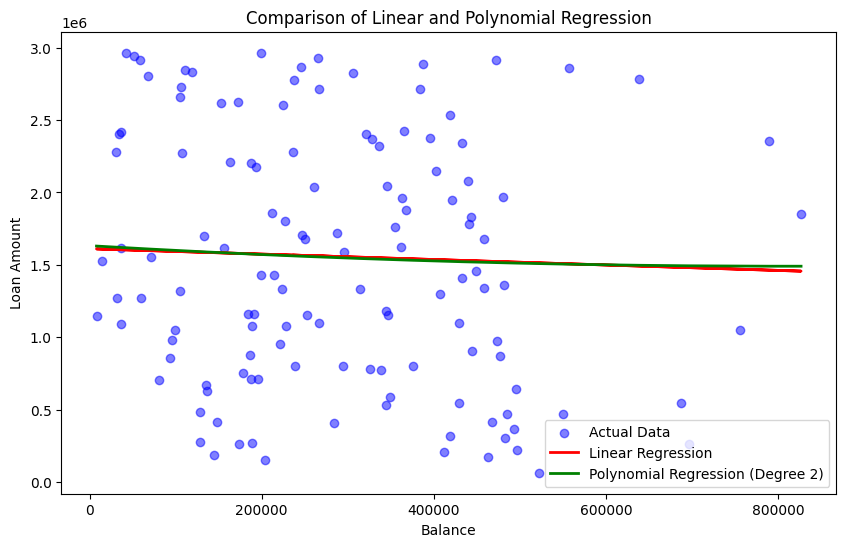

In [22]:
#task 6 (single feature)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('loan dataset_cleaned.csv')  

X = df[['Balance']] 
y = df['Loan_Amount'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)


print("--- Model Performance ---")
print(f"Linear Regression -> MSE: {linear_mse:.4f}, R²: {linear_r2:.4f}")
print(f"Polynomial Regression (Degree 2) -> MSE: {poly_mse:.4f}, R²: {poly_r2:.4f}")


plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.5)

plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression', linewidth=2)

sorted_X_test = np.sort(X_test.values, axis=0)
sorted_X_test_poly = poly.transform(sorted_X_test)
y_pred_poly_sorted = poly_model.predict(sorted_X_test_poly)


plt.plot(sorted_X_test, y_pred_poly_sorted, color='green', label='Polynomial Regression (Degree 2)', linewidth=2)


plt.title('Comparison of Linear and Polynomial Regression')
plt.xlabel('Balance')
plt.ylabel('Loan Amount')
plt.legend()


plt.show()
